In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\MASAI\PROJECT-20230705T045048Z-001\PROJECT\Price Prediction\Datasets\cleaned-&-prepared-data-for-model.csv")
df.head()

,manufacturer,brand,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in lakh Rs.)
0,Hyundai,Hyundai Elite i20 Asta 1.2 (O),2018,34,19.800,5,Petrol,Manual,170,285,45,82.00,6.65
1,Hyundai,Hyundai Creta SX IVT Petrol,2021,19,19.365,5,Petrol,Automatic,190,433,50,88.51,15.24
2,Hyundai,Hyundai Creta 1.6 SX,2019,51,19.365,5,Diesel,Manual,170,400,55,126.00,11.88
3,Hyundai,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,2015,44,18.900,5,Petrol,Manual,165,350,43,81.00,4.06
4,Renault,Renault Kwid 1.0 RXL,2021,12,21.700,5,Petrol,Manual,184,279,28,67.00,3.75


In [3]:
df.shape

(1394, 13)

### Importing car-body dataset corresponding to the unique values of brand column

In [4]:
car_body = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\MASAI\PROJECT-20230705T045048Z-001\PROJECT\Price Prediction\Datasets\car-body-types.csv", index_col=0)
car_body

,car-body
0,"('Hyundai Elite i20 Asta 1.2 (O)', 'Hatchback')"
1,"('Hyundai Creta SX IVT Petrol', 'SUV')"
2,"('Hyundai Creta 1.6 SX', 'SUV')"
3,"('Hyundai Grand i10 Sportz 1.2 Kappa VTVT', 'H..."
4,"('Renault Kwid 1.0 RXL', 'Hatchback')"
...,...
638,"('Tata Nano Twist XM Petrol', 'Hatchback')"
639,"('Honda Jazz SV', 'Hatchback')"
640,"('Tata Altroz XM Plus 1.2', 'Hatchback')"
641,"('Renault Duster RXS Sandstorm edition 110PS',..."


In [5]:
brand = pd.DataFrame(df['brand'].unique(), columns=["brand"])
brand

,brand
0,Hyundai Elite i20 Asta 1.2 (O)
1,Hyundai Creta SX IVT Petrol
2,Hyundai Creta 1.6 SX
3,Hyundai Grand i10 Sportz 1.2 Kappa VTVT
4,Renault Kwid 1.0 RXL
...,...
638,Tata Nano Twist XM Petrol
639,Honda Jazz SV
640,Tata Altroz XM Plus 1.2
641,Renault Duster RXS Sandstorm edition 110PS


In [6]:
body_concat = pd.concat([brand, car_body], axis=1)

In [7]:
body_concat

,brand,car-body
0,Hyundai Elite i20 Asta 1.2 (O),"('Hyundai Elite i20 Asta 1.2 (O)', 'Hatchback')"
1,Hyundai Creta SX IVT Petrol,"('Hyundai Creta SX IVT Petrol', 'SUV')"
2,Hyundai Creta 1.6 SX,"('Hyundai Creta 1.6 SX', 'SUV')"
3,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,"('Hyundai Grand i10 Sportz 1.2 Kappa VTVT', 'H..."
4,Renault Kwid 1.0 RXL,"('Renault Kwid 1.0 RXL', 'Hatchback')"
...,...,...
638,Tata Nano Twist XM Petrol,"('Tata Nano Twist XM Petrol', 'Hatchback')"
639,Honda Jazz SV,"('Honda Jazz SV', 'Hatchback')"
640,Tata Altroz XM Plus 1.2,"('Tata Altroz XM Plus 1.2', 'Hatchback')"
641,Renault Duster RXS Sandstorm edition 110PS,"('Renault Duster RXS Sandstorm edition 110PS',..."


### Cleaning car-body column to get only body-type

In [8]:
body_concat['car-body'][1]

"('Hyundai Creta SX IVT Petrol', 'SUV')"

In [9]:
def body_type(car):
    return car.split(",")[1].strip("')").strip(" '")

In [10]:
body_type(body_concat['car-body'][1])

'SUV'

In [11]:
body_concat['car-body'] = body_concat['car-body'].apply(lambda x: body_type(x))

In [12]:
body_concat.head()

,brand,car-body
0,Hyundai Elite i20 Asta 1.2 (O),Hatchback
1,Hyundai Creta SX IVT Petrol,SUV
2,Hyundai Creta 1.6 SX,SUV
3,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,Hatchback
4,Renault Kwid 1.0 RXL,Hatchback


### Merging the car-body column value with original dataset - df based on common column - brand

In [13]:
df = pd.merge(left = df, right = body_concat, how='left', on='brand')
df.head(2)

,manufacturer,brand,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in lakh Rs.),car-body
0,Hyundai,Hyundai Elite i20 Asta 1.2 (O),2018,34,19.800,5,Petrol,Manual,170,285,45,82.00,6.65,Hatchback
1,Hyundai,Hyundai Creta SX IVT Petrol,2021,19,19.365,5,Petrol,Automatic,190,433,50,88.51,15.24,SUV


In [14]:
df['car-body'].value_counts()

car-body
Hatchback    546
SUV          505
Sedan        289
MPV           49
Van            4
Minivan        1
Name: count, dtype: int64

**Let's replace MPV and Minivan with Van, considering the similarity of their body-type**

In [15]:
df['car-body'].replace(['MPV','Minivan'],'Van', inplace=True)

In [16]:
df['car-body'].value_counts()

car-body
Hatchback    546
SUV          505
Sedan        289
Van           54
Name: count, dtype: int64

# DATA ANALYSIS AND VISUALISATION

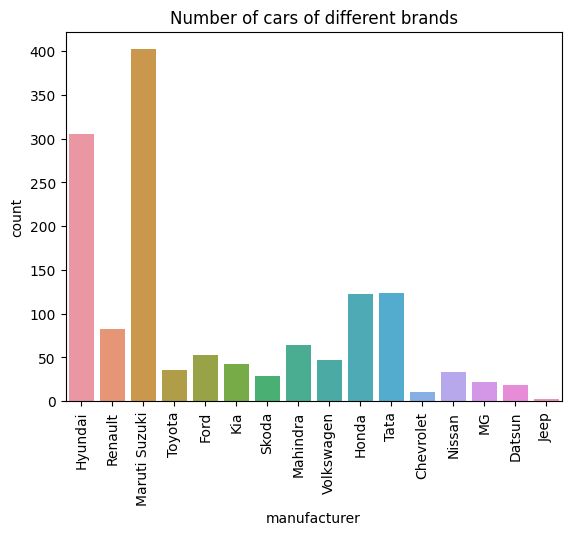

In [17]:
sns.countplot(data = df, x='manufacturer')
plt.xticks(rotation=90)
plt.title('Number of cars of different brands')
plt.show()

### Pivot table showing average price of cars of different brands based on transmission

In [18]:
df.pivot_table(index = 'manufacturer', values = 'price (in lakh Rs.)', columns = 'transmission', aggfunc='mean')

transmission,Automatic,Manual
manufacturer,,
Chevrolet,7.465000,2.643333
Datsun,NaN,3.098889
Ford,8.074000,6.744792
Honda,9.974286,6.898922
Hyundai,10.331972,6.812735
Jeep,NaN,14.430000
Kia,15.872857,12.140345
MG,18.233750,16.513571
Mahindra,13.521429,9.850000


In [19]:
df_fuel = df.pivot_table(index = 'model (year)', values = 'price (in lakh Rs.)', columns = 'fuel_type', aggfunc='mean')
df_fuel

fuel_type,Diesel,Petrol,Petrol+cng
model (year),,,
2009,NaN,1.820000,NaN
2010,5.140000,2.550000,NaN
2011,2.935000,3.062174,NaN
2012,4.622727,3.650588,NaN
2013,5.019091,3.781842,3.590000
2014,4.968158,3.935893,4.410000
2015,6.910370,5.127959,NaN
2016,7.387742,5.382642,4.836667
2017,8.208730,6.660238,6.210000


### Average Price of cars of different brands

In [20]:
avg_price = df.groupby('manufacturer')['price (in lakh Rs.)'].mean().sort_values(ascending=False)
avg_price

manufacturer
MG               17.139091
Jeep             14.430000
Kia              13.355581
Skoda            11.261379
Tata             11.103871
Mahindra         10.653125
Toyota            8.828056
Volkswagen        8.427021
Hyundai           7.631967
Honda             7.423984
Nissan            6.966970
Ford              6.870189
Renault           6.597439
Maruti Suzuki     6.084701
Chevrolet         3.520000
Datsun            3.098889
Name: price (in lakh Rs.), dtype: float64

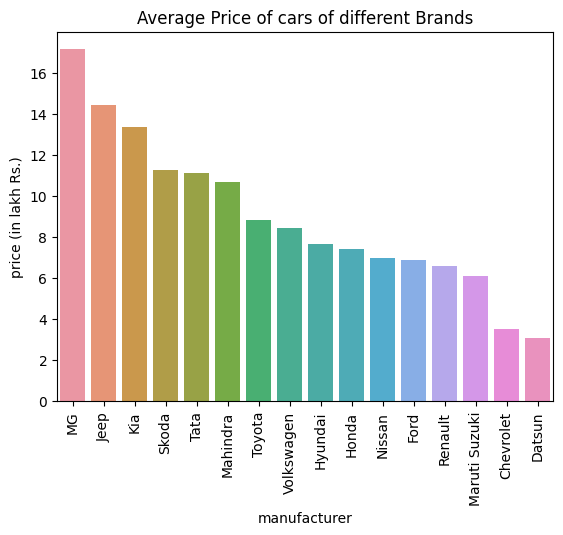

In [21]:
sns.barplot(x = avg_price.index, y= avg_price)
plt.title('Average Price of cars of different Brands')
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head(2)

,manufacturer,brand,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in lakh Rs.),car-body
0,Hyundai,Hyundai Elite i20 Asta 1.2 (O),2018,34,19.800,5,Petrol,Manual,170,285,45,82.00,6.65,Hatchback
1,Hyundai,Hyundai Creta SX IVT Petrol,2021,19,19.365,5,Petrol,Automatic,190,433,50,88.51,15.24,SUV


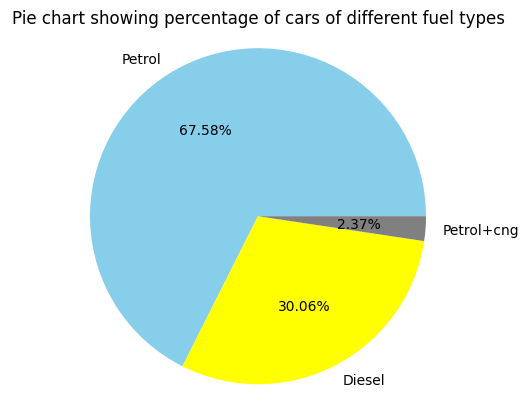

In [23]:
fuel = df['fuel_type'].value_counts()
plt.pie(x = fuel, labels = fuel.index, colors=['skyblue','yellow','grey'], autopct='%1.2f%%')
plt.axis('equal')
plt.title('Pie chart showing percentage of cars of different fuel types')
plt.show()

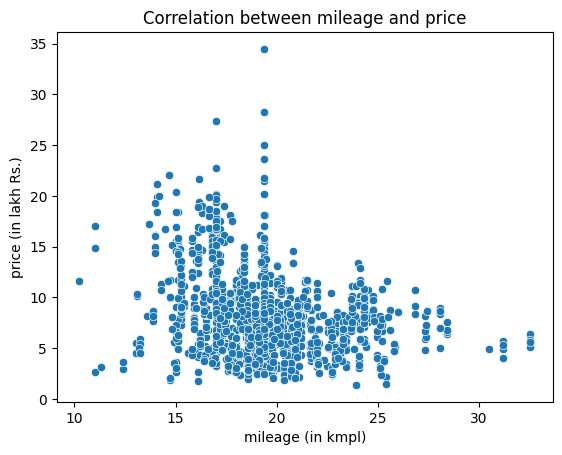

In [24]:
sns.scatterplot(data = df, x='mileage (in kmpl)', y='price (in lakh Rs.)')
plt.title('Correlation between mileage and price')
plt.show()

In [25]:
body = df['car-body'].value_counts()
body

car-body
Hatchback    546
SUV          505
Sedan        289
Van           54
Name: count, dtype: int64

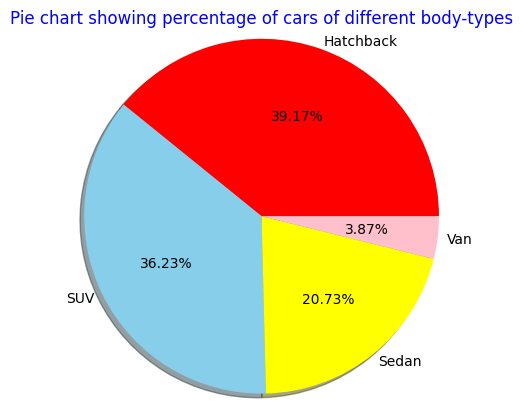

In [26]:
plt.pie(x = body, labels = body.index, autopct='%1.2f%%', shadow=True,radius=1.2, colors=['red','skyblue','yellow','pink'],labeldistance=1.05)
plt.title('Pie chart showing percentage of cars of different body-types', color = 'Blue')
plt.show()

In [27]:
avg_price_body_type = df.groupby('car-body')['price (in lakh Rs.)'].mean()
avg_price_body_type

car-body
Hatchback     5.208773
SUV          10.888376
Sedan         7.533356
Van           8.815926
Name: price (in lakh Rs.), dtype: float64

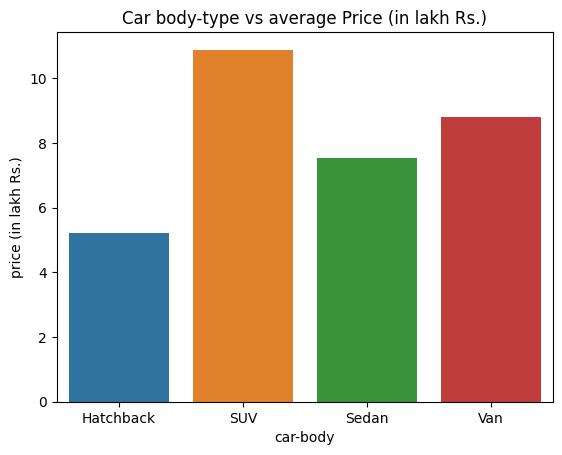

In [28]:
sns.barplot(x=avg_price_body_type.index, y=avg_price_body_type)
plt.title('Car body-type vs average Price (in lakh Rs.)')
plt.show()

# DROPING IRRELEVANT COLUMNS | ENCODING | SCALING

In [29]:
df.drop(['brand'], axis = 1, inplace = True)

In [30]:
df.head(2)

,manufacturer,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in lakh Rs.),car-body
0,Hyundai,2018,34,19.800,5,Petrol,Manual,170,285,45,82.00,6.65,Hatchback
1,Hyundai,2021,19,19.365,5,Petrol,Automatic,190,433,50,88.51,15.24,SUV


In [31]:
cat = []
num = []

for i in df.columns:
    if df[i].dtypes == "O":
        cat.append(i)
    else:
        num.append(i)

In [32]:
cat

['manufacturer', 'fuel_type', 'transmission', 'car-body']

In [33]:
df = pd.get_dummies(data = df, columns = cat, dtype = 'int')

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
df.head(2)

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in lakh Rs.),manufacturer_Chevrolet,manufacturer_Datsun,manufacturer_Ford,manufacturer_Honda,manufacturer_Hyundai,manufacturer_Jeep,manufacturer_Kia,manufacturer_MG,manufacturer_Mahindra,manufacturer_Maruti Suzuki,manufacturer_Nissan,manufacturer_Renault,manufacturer_Skoda,manufacturer_Tata,manufacturer_Toyota,manufacturer_Volkswagen,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol+cng,transmission_Automatic,transmission_Manual,car-body_Hatchback,car-body_SUV,car-body_Sedan,car-body_Van
0,2018,34,19.800,5,170,285,45,82.00,6.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,2021,19,19.365,5,190,433,50,88.51,15.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [36]:
df.shape

(1394, 34)

In [37]:
df = df[['manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai', 'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti Suzuki', 'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda', 'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen','car-body_Hatchback', 'car-body_SUV', 'car-body_Sedan', 'car-body_Van', 'fuel_type_Diesel', 'fuel_type_Petrol', 'fuel_type_Petrol+cng', 'transmission_Automatic', 'transmission_Manual','model (year)','km driven (in thousands)','mileage (in kmpl)','seating capacity (units)','ground clearance (in mm)', 'boot space (in litres)','fuel tank capacity (in litres)', 'max power (in bhp)', 'price (in lakh Rs.)']]

In [38]:
df.shape

(1394, 34)

# OUTLIER ANALYSIS

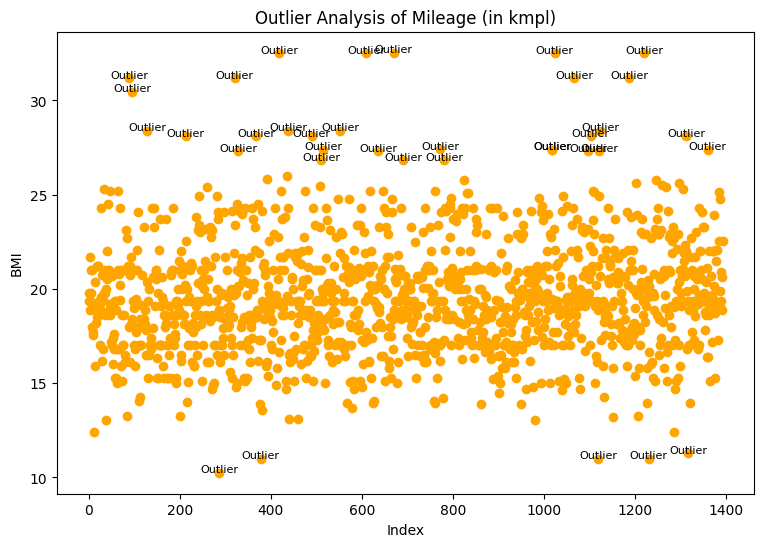

In [39]:
x = range(len(df))
y = df['mileage (in kmpl)']

q1 = df['mileage (in kmpl)'].quantile(0.25)
q3 = df['mileage (in kmpl)'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

outliers_above = np.where(y >= ul)[0]
outliers_below = np.where(y <= ll)[0]
outliers = np.concatenate((outliers_above, outliers_below))

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color ='orange')

for i in outliers:
    plt.annotate('Outlier', (x[i], y[i]), ha='center', fontsize=8, color='black')
    
plt.xlabel('Index')
plt.ylabel('BMI')
plt.title('Outlier Analysis of Mileage (in kmpl)')
# plt.grid(True)

plt.show()

**It is clearly visible that roughly below 15 and above 25 there are some outliers present in the mileage data**

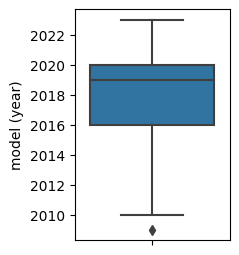

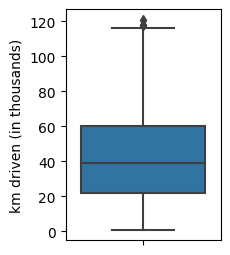

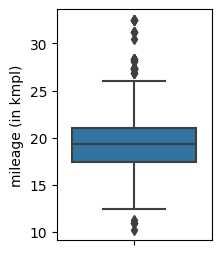

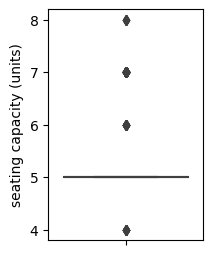

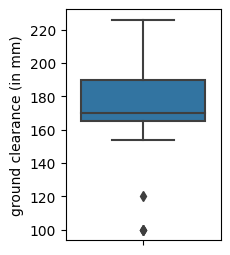

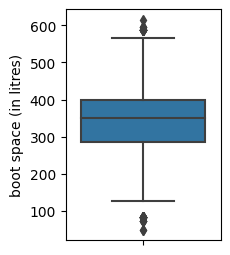

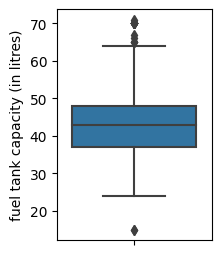

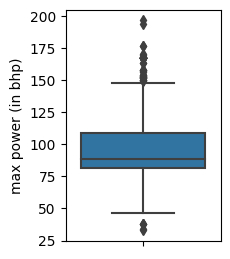

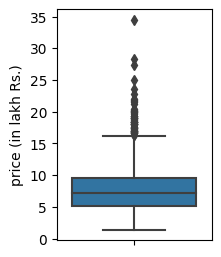

In [40]:
for i in num:
    plt.figure(figsize=(2,3))
    sns.boxplot(df[num], y = i)
    plt.show()

We can remove outliers from the above features except the seating capacity column (which is more like a categorical feature)

In [41]:
num

['model (year)',
 'km driven (in thousands)',
 'mileage (in kmpl)',
 'seating capacity (units)',
 'ground clearance (in mm)',
 'boot space (in litres)',
 'fuel tank capacity (in litres)',
 'max power (in bhp)',
 'price (in lakh Rs.)']

In [42]:
out = ['model (year)','km driven (in thousands)','mileage (in kmpl)','ground clearance (in mm)','boot space (in litres)',
       'fuel tank capacity (in litres)','max power (in bhp)','price (in lakh Rs.)']

**Let's first remove outliers from a duplicate dataframe to check the amount of data loss**

In [43]:
df1 = df.copy()

In [44]:
for i in out:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df1 = df1[(df1[i]<=ul) & (df1[i]>=ll)]

In [45]:
df1.shape

(1225, 34)

**On removing outliers, we are not loosing much data, so let's actually remove them from the original dataset**

In [46]:
for i in out:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df = df[(df[i]<=ul) & (df[i]>=ll)]

In [47]:
df.shape

(1225, 34)

### SCALING (for now kept optional)

In [48]:
# num

In [49]:
# num.remove('price (in ₹)')

In [50]:
# sc = StandardScaler()

In [51]:
# df[num] = sc.fit_transform(df[num])

In [52]:
# df.head(2)

### ANALYSING CORRELATION BETWEEN DIFFERENT FEATURES

<Axes: >

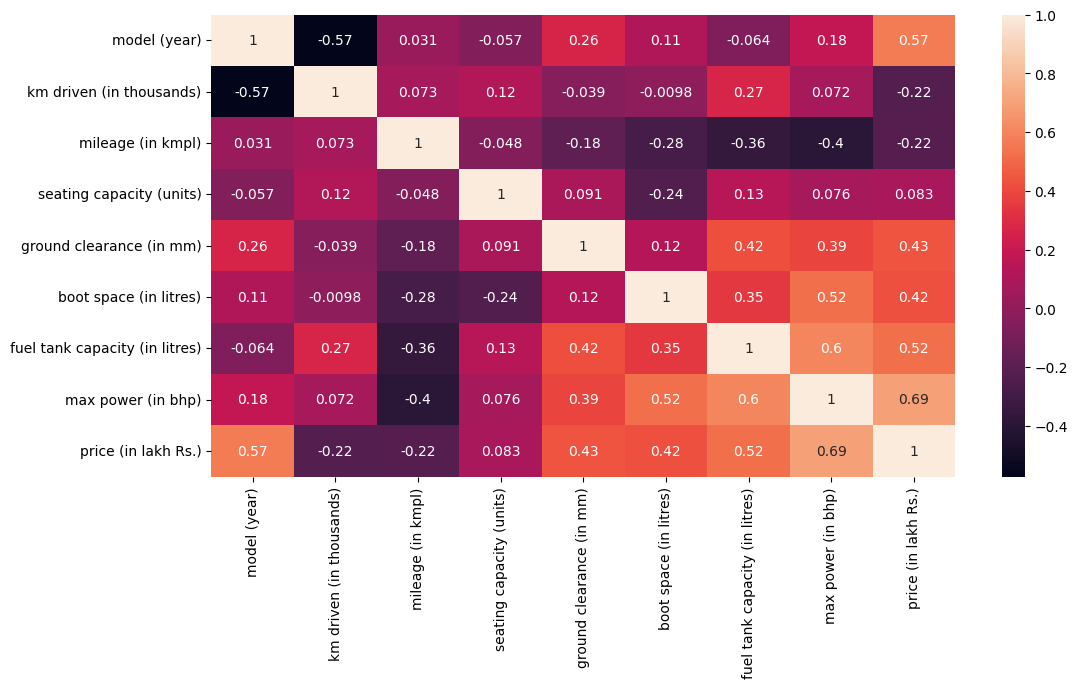

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num].corr(), annot=True)

In [54]:
# sns.pairplot(df[num], diag_kind='kde')

It is clearly visible with the help of these plots that no two features are highly correlated with each other. This will help us building a better model.

# MODEL PREPARATION

In [55]:
x = df.drop('price (in lakh Rs.)', axis=1)
y = df['price (in lakh Rs.)']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)

In [60]:
lr.coef_

array([-9.49634616e+10, -9.49634616e+10, -9.49634616e+10, -9.49634616e+10,
       -9.49634616e+10,  1.14440918e-03, -9.49634616e+10, -9.49634616e+10,
       -9.49634616e+10, -9.49634616e+10, -9.49634616e+10, -9.49634616e+10,
       -9.49634616e+10, -9.49634616e+10, -9.49634616e+10, -9.49634616e+10,
       -5.19792540e-01,  6.72286886e-01, -3.92022234e-01,  2.38652994e-01,
        7.72885013e-01, -4.47310526e-01, -3.25382005e-01,  5.32150400e-01,
       -5.32286358e-01,  4.34760805e-01, -1.43188844e-02, -4.59380397e-02,
        2.78229212e-01, -8.50562223e-03,  2.50157648e-03,  7.17432080e-02,
        4.66457315e-02])

In [61]:
lr.intercept_

94963460744.59618

## EVALUATING THE MODEL

### Mean Squared Error

In [62]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

1.3361069662876872

### Root Mean Squared Error

In [63]:
rmse = np.sqrt(mse)
rmse

1.1559009327306935

### R2 Score or Coefficient of Determination

In [64]:
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.8414742010742794

### Adjusted R2 Score

Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]

Where:

* R² is the regular R-squared score
* n refers to the number of observations/records in the training dataset (or the sample size)
* p represents the number of predictors or independent variables in the model

In [65]:
n = x_train.shape[0]
n

857

In [66]:
p = x_train.shape[1]
p

33

In [67]:
adjusted_r2_score = 1 - ((1 - r2_score)*(n-1)/(n-p-1))
adjusted_r2_score

0.8351177595620695

## OUR MODEL IS PERFORMING WELL!

## Now, let's apply our model in a real life scenario by predicting price of a pre-owned car having the desired features & details

In [68]:
list_of_brands = ['Chevrolet','Datsun','Ford','Honda','Hyundai','Jeep','Kia', 'MG', 'Mahindra','Maruti Suzuki', 'Nissan',
                  'Renault', 'Skoda', 'Tata','Toyota', 'Volkswagen']

In [69]:
list_of_car_body_types = ['Hatchback', 'SUV', 'Sedan', 'Van']

In [70]:
list_of_fuel_types = ['Diesel', 'Petrol', 'Petrol+cng']

In [71]:
list_of_transmission_types = ['Automatic', 'Manual']

## Predicting price of a used car having:
* brand = Tata
* body type = SUV
* fuel type = Petrol
* transmission = Manual
* model (year) = 2016
* km driven (in thousands) = not more than 60k
* mileage (in kmpl) = at least 18 kmpl
* seating capacity (units) = 5
* ground clearance (in mm) = not less than 180 mm
* boot space (in litres) = at least 350 litres
* fuel tank capacity (in litres) = 35 litres is enough
* max power (in bhp) = 120 bhp

In [72]:
lr.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,  0,1,0,0,  0,1,0,  0,1,  2016,60,18,5,180,350,35,120]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.1413269])

## **So, a pre-owned car having the above desired features and details will cost a buyer around ₹7.14 lakhs.**

### This model can also be used by sellers to get an idea of prices of their cars that they can expect in the market

# | THANKS |